## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: Mangesh Raut
    - Email: mbr63@drexel.edu
- Group member 2
    - Name: Josh Clark
    - Email: jc4577@drexel.edu
- Group member 3
    - Name: Mobin Rahimi
    - Email: mr3596@drexel.edu
- Group member 4
    - Name: Will Wu
    - Email: ww437@drexel.edu

### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

# Assignment group 3: Probabilistic modeling and prediction

## Module A _(55 pts)_ Optimizing for predicted separation
__Data.__ For this module we'll be working with the basic baseball player heights and weights from the lecture notes. These are packaged in the following location:

- `"./data/baseball_heightweight.csv"`

__Overview.__ The purpose of this module is to provide experience with optimization and to view/investigate different optimizable functions (from error). In the __Chapter 5__ lecture notes we investigated the sum of squared errors as a function of (linear) model parameters. This made the goal of optimization (executed through gradient descent) into a 'fitting' procedure, i.e., describing a pattern that data follows.

Another way we can use a line is as a 'separator': supposing some data $x_1, \cdots, x_n$ have labels $y_1, \cdots, y_n$ falling into two classes (coded as $\pm 1$), which set of line-defining $w$ and $b$ parameters separate the points the best? Check out the picture  below for an intution (note: their $b$ is our $-b$).

Note: even though we're talking about 'lines', and actually working with true, 2-dimensional lines throughout this module, it's important to think/code throughout this module with the expectation that each data point $x_i$ will have $m$ (potentially greater than 2) dimensions. When $m>3$, a 'line' technically refers to a plane, but after we leave the comfort of 3-dimensionality our 'lines' are technically _hyperplanes_, for which we have little experiential intuition. Hence, we'll adopt the terminology 'line' throughout, since this provides the strongest grounding of intuition.

![SVM Margin](./img/SVM_margin.png)

__A1.__ _(7 pts_) To get things started, complete the function called `read_baseball()`, which must: 

1. load the baseball player data with pandas into a dataframe called `bball`;
2. filter `bball` to contain only those rows that correspond to shortstops and catchers;
3. create an `.array()` called `y_bball` of labels, containing a `1` for each catcher and a `-1` for each shortstop;
4. filter the remaining rows of `bball` to only the `Height` and `Weight` columns; and
5. `return`s `y_bball` and the standardized columns of `bball`'s `.values` as an `np.array()` object.

In [33]:
# A1:Function(7/7)

import numpy as np
import pandas as pd

def read_baseball(path_to_baseball):
    
    bball = pd.read_csv(path_to_baseball)
    
    #--- Your code starts here
    bball = bball[(bball['Position']=='Catcher')|(bball['Position']=='Shortstop')]
    bball['Position'] = np.where(bball['Position']=='Catcher', 1, -1)
    y_bball = bball['Position'].to_numpy()
    bball = bball.loc[:,['Height','Weight']]
    bball = (bball - bball.mean()) / bball.std(ddof=0)
    bball = bball.to_numpy()
    #--- Your code stops here

    return y_bball, bball

Your output should look like this:
```
(array([1, 1, 1, -1, 1, 1, -1, -1, 1, 1], dtype=object),
 array([[ 0.89008344, -0.84843489],
        [ 0.89008344,  1.05110949],
        [-0.21603967,  0.77974601],
        [-1.87522433,  0.72547331],
        [ 1.44314499,  2.67929038],
        [ 1.44314499,  2.4079269 ],
        [-0.76910122, -1.11979837],
        [ 0.89008344,  0.18274634],
        [ 0.89008344,  1.32247297],
        [-0.21603967, -0.84843489]]))
```

In [34]:
# A1:SanityCheck
y_bball, data_bball = read_baseball("./data/baseball_heightweight.csv")

y_bball[:10], data_bball[:10,:]

(array([ 1,  1,  1, -1,  1,  1, -1, -1,  1,  1]),
 array([[ 0.89008344, -0.84843489],
        [ 0.89008344,  1.05110949],
        [-0.21603967,  0.77974601],
        [-1.87522433,  0.72547331],
        [ 1.44314499,  2.67929038],
        [ 1.44314499,  2.4079269 ],
        [-0.76910122, -1.11979837],
        [ 0.89008344,  0.18274634],
        [ 0.89008344,  1.32247297],
        [-0.21603967, -0.84843489]]))

__A2.__ _(5 pts)_ Since the goal with this problem will be to draw a line that separates the catchers from the shortstops, complete the function called 

- `plot_data(data, y)` 

that creates a scatter plot of the standardized heights and weights where the points are color coded with shortstops as black circles and catchers as red squares.

In [39]:
# A2:Function(5/5)

%matplotlib inline
import matplotlib.pyplot as plt
def plot_data(data, y):

    fig = plt.figure(figsize = (6,6))
    
    #--- Your code starts here
    plt.scatter(data_bball[:,0][y_bball==-1],
                data_bball[:,1][y_bball==-1],
                marker="o",
                color="black",
                label="Shortstop")
    plt.scatter(data_bball[:,0][y_bball==1],
                data_bball[:,1][y_bball==1],
                marker="s",
                color="red",
                label="Catchers")
    #--- Your code stops here
    
    plt.xlabel("Height", fontsize = 15)
    plt.ylabel("Weight", fontsize = 15)
    plt.title('Standardized player heights and weights', fontsize = 15)
    plt.legend(fontsize = 15)
    plt.grid()
    
    return fig

Your ouput should look like:

![img](./img/A2-expected-output.png)

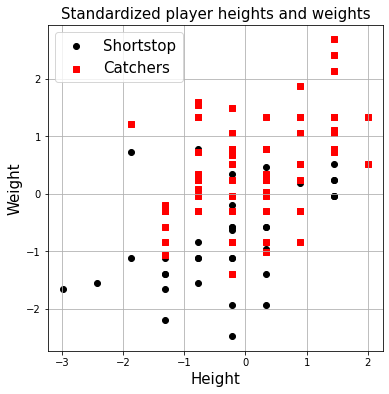

In [40]:
# A2:SanityCheck

fig = plot_data(data_bball, y_bball)

__A3.__ _(7 pts)_ The way we'll be drawing lines (hyperplanes) in this problem uses what's called the 'standard form'. Supposing we have vectors (rows) of features (columns) $x = [x_1, \cdots, x_m]$, a linear relationship is defined by a vector of weights $w = [w_1,\cdots,w_m]$ and an intercept $b$ in the form:
$$
w\cdot x + b = 0
$$
Since our data only has two columns, we can re-arrange into slope-intercept form:
$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$$
to conveniently plot a line in standard form. 

So, complete the `plot_boundary()` function below (that carrys forward your scatter plot from __A2__) to accept a `w` (a vector) and `b` (a scalar) arguments and&mdash;if non-zero&mdash;plot the corresponding line over the range of $x_1$ values using the slope-intercept form above. 

In [41]:
# A3:Function(7/7)

def plot_boundary(data, y, w = np.array([]), b = 0):
    
    fig = plot_data(data, y)
    
    #--- Your code starts here
    intercept = -b / w[1]
    slope = -w[0] / w[1]
    x_ = data[:,0]
    xx = np.linspace(-3,2)
    yy = (slope * xx) + intercept
    plt.plot(xx, yy, c='b', label='Separator')
    #--- Your code stops here
    
    plt.legend(fontsize = 15)
    
    return fig

Your output should look like:

![img](./img/A3-expected-output.png)

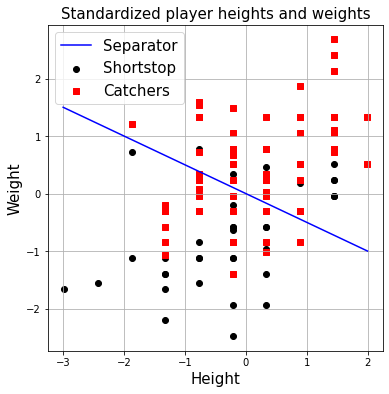

In [42]:
# A3:SanityCheck

fig = plot_boundary(data_bball, y_bball, w = np.array([0.25, 0.5]), b = 0)

__A4.__ _(3 pts)_ Now, for any point $x$ on the line defined by $w$ and $b$, the following relationship holds:
$$
w\cdot x + b = 0
$$

But our points probably don't lie exactly on a line. To tell which sides of the line they fall on, we can just look at the sign of the left hand side of the equation above:

- $x$ is above the line:
    - $\hat{y} = w\cdot x_i + b > 0$ 
- $x$ is below the line:
    - $\hat{y} = w\cdot x_i + b < 0$

What we're hoping to do is have all $x$'s either have $y,\hat{y} < 0$ or $y,\hat{y} > 0$. One way to test if a point is 'correctly' separated is if $y\hat{y} > 0$, so use this test ($y\hat{y} > 0$ means 'separated') to complete the function:
- `separated(data, y, w, b)`

that outputs a boolean mask of $n$ values where `True` corresponds to a point falling on the correct side of the line ($y\hat{y} > 0$). When this is done, use your function to calculate/report the percent of points your line correctly separated below.

In [55]:
# A4:Function(3/3)

def separated(data, y, w, b):
    
    #--- Your code starts here
    y_hat = (data @ w) + b
    
    is_separated = y*y_hat >= 0
    #--- Your code stops here
    
    return is_separated

The `SanityCheck` should show: `70.3125 percent were separated correctly`.

In [56]:
# A4:SanityCheck

is_sep = separated(data_bball, y_bball, np.array([0.25, 0.5]), 0)

print(100*sum(is_sep)/len(y_bball), "percent were separated correctly")

70.3125 percent were separated correctly


__A5.__ _(5 pts)_ Now that we have our `separated()` function, use it's output mask to complete the `plot_separated(data, y, w, b)` function, which carries forward the materials from `plot_boundary`, but re-plots the color for _correctness of separation_, as well. In particular, organize your points as follows, so that:
- incorrectly separated negative points (shortstops) are plotted over with green triangles, and
- incorrectly separated positive points (catchers) are plotted over with yellow diamonds.

In [67]:
# A5:Function(5/5)

def plot_separated(data, y, w, b):
    
    fig = plot_boundary(data_bball, y_bball, w = w, b = b)
    
    is_sep = separated(data, y, w, b)
    not_sep = np.logical_not(is_sep)
    
    #--- Your code starts here
    y_ns = y[not_sep]
    data_ns = data[not_sep]
    plt.scatter(data_ns[:,0][y_ns==-1],
                data_ns[:,1][y_ns==-1],
                marker = u"^",
                color = "green",
                label = "Unseparated shortstops")
    plt.scatter(data_ns[:,0][y_ns==1],
                data_ns[:,1][y_ns==1],
                marker = u"d",
                color = "darkkhaki",
                label = "Unseparated catchers")
    #--- Your code stops here
       
    plt.legend(fontsize = 12)

    return fig

Your output should look like:

![img](./img/A5-expected-output.png)

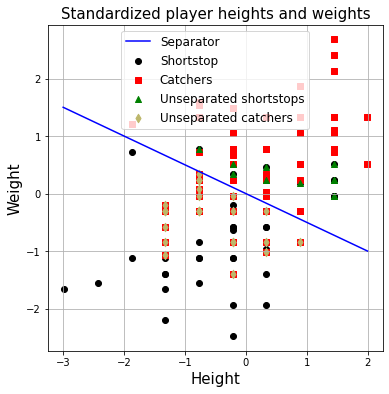

In [68]:
# A5:SanityCheck

fig = plot_separated(data_bball, y_bball, w = np.array([0.25, 0.5]), b = 0)

__A6.__ _(5 pts)_ Now, most of all we'll want to reduce the number of points $x$ for which our prediction $\hat{y}$ has a different sign from the true label $y$. In these (bad) cases, one will have $y\hat{y} < 0$.

However, 'edge cases' are bad, too, and since we've provided our points with unit ($y = \pm 1$) labels it's also important to pay attention to points whose prediction have correct sign ($y\hat{y} > 0$), but are close to the boundary (here, within one unit):

$$
y(w\cdot x + b) = y\hat{y} < 1
$$

Thus, our objective function will seek to _maximize_ the distance between our $(w,b)$ separating line (plane) and 'bad' points holding the relationship $y(w\cdot x + b) = y\hat{y} < 1$. So, for a given plane $(w,b)$ and $n$ `data` points $x_i: i=1,\cdots n$, we'll be working with a subset of $k$ 'bad' points: $x_{i_\ell}:\ell=1,\cdots k$. To identify these, complete the function:

- `bad_points(data, y, w, b)`

that takes `data` of $n$ rows and $m$ columns/features, line-defining parameters $w$ (a vector of $m$) and $b$ (a scalar), and outputs a boolean mask positively identifying the 'bad points' using a boolean mask, i.e., those for which:

$$
y(w\cdot x + b) = y\hat{y} < 1
$$

Note: this function is very similar to the requested `separated()` in __A4__.

In [72]:
# A6:Function(5/5)
def bad_points(data, y, w, b):
    
    #--- Your code starts here
    y_hat = (data @ w) + b
    
    is_bad = y*y_hat < 1
    #--- Your code stops here
    
    return is_bad

Your output should look like:

```
array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False])
```

In [73]:
# A6:SanityCheck
bad_points(data_bball, y_bball, w = np.array([0.25, 0.5]), b = 0)

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False]

__A7.__ _(5 pts)_ "How bad" a point is, is defined by distance&mdash;between our line (hyperplane) and the point. For a given point $x$ and line defined by $w$ and $b$, the distance is:
$$
d(x;w, b) = \frac{|w\cdot x + b|}{\|w\|}
$$
But since being on the wrong side (having the wrong sign) is extra bad, it's actually the signed distances we care about:
$$
d(x;w, b)_\text{sgn} =\frac{y(w\cdot x + b)}{\|w\|}
$$
This makes the sum of signed distances for the 'bad points' we've found into our objective function, which we'll aim to maximize:
$$
\begin{align*}
   D (X; w, b) 
   = &\sum_{\ell=1}^k d_\text{sgn}(x_{i_\ell};w, b) \\
   = &\sum_{\ell=1}^k \frac{y_{i_\ell}(w\cdot x_{i_\ell}+ b)}{\|w\|}
\end{align*}
$$

Since this is our objective function, we must express it's gradient components with respect to the parameters $b$ and $w_j$ (for any $j$ of the $m$ features):
$$
\nabla_b(D) = \frac{1}{\|w\|}\sum_{\ell=1}^k y_{i_\ell}
$$
$$
\nabla_{w_j}(D) = \frac{1}{\|w\|}\sum_{\ell=1}^k y_{i_\ell}x_{{i_\ell},j}
$$

Now that we have a formula, complete the `gradient(data, y, w, b)` function. Use the above formulae to accept $w$, $b$, and a `data` matrix of $x_i$ rows, and computes the gradient for the $m + 1$ parameters.

In [84]:
# A7:Function(5/5)

def gradient(data, y, w, b):
    
    #--- Your code starts here
    points = bad_points(data, y, w, b)
    mod_w = np.sqrt(w.dot(w))
    g_w = sum((data*y[:,None])[points]) / mod_w
    g_b = sum((y[:,None])[points]) / mod_w
    #--- Your code stops here
    
    return(g_w, g_b)

Your output should look like:

```
(array([8.749533842943988, 77.43059665753808], dtype=object),
 array([46.51021393199562], dtype=object))
```

In [85]:
# A7:SanityCheck

gradient(data_bball, y_bball, np.array([0.25, 0.5]), 0)

(array([ 8.74953384, 77.43059666]), array([46.51021393]))

__A8.__ _(10 pts)_ Finally, it's time to pull things together into a gradient descent application. Specifically, complete the function
- `GD(data, y, w, b, eta=0.001, iter_num=1000, threshold=0.001)`
that accepts the following arguments:

- `data`: a matrix of $n$ row/data points by $m$ feature/columns
- `y`:  an array of $n$ $\pm 1$ valued 'labels'
- `w`, `b`: an array of initial weights and an intercept (initial parameters) 
- `eta=0.001`: the 'learning rate' i.e., 'sensitivity' knob
- `iter_num=1000`: the max number of gradient steps to take before terminating
- `threshold=0.001`: a fixed, minimum distance that when steps fall below terminates the algorithm

To correctly implement, your code must do the following:
1. loop over `iter_num` steps
2. compute $w$ and $b$ gradient components
3. determinie $w$ and $b$ steps sizes
4. update $w$ and $b$ by _adding_ gradient components (this is technically ascent)
5. terminate if `iter_num` steps are complete or if the most recent step is smaller than `threshold`
6. `return` a list of the history of $w$ and $b$ values



In [86]:
# A8:Function(10/10)

def GD(data, y, w, b, eta=0.001, iter_num=1000, threshold=0.001):  
    ws, bs = [], []

    #--- Your code starts here
    for i in range(iter_num):
        g_w, g_b = gradient(data, y, w, b)
        
        gd_w = eta * g_w
        gd_b = float(eta*g_b)
        
        w = w + gd_w; ws.append(w)
        b = b + gd_b; bs.append(b)
        
        if np.sqrt(gd_w.dot(gd_w) + gd_b**2) < threshold:
            break
    #--- Your code stops here
        
    return ws, bs

Your output should look like:

```
([array([-0.2968301080080123, 1.3914983198309954], dtype=object),
  array([-0.29713378923322975, 1.3935480091803414], dtype=object),
  array([-0.2974370297194507, 1.395594723772106], dtype=object),
  array([-0.2998291628257651, 1.396473376991912], dtype=object),
  array([-0.30013167624574383, 1.3985151842670263], dtype=object),
  array([-0.3004337540237254, 1.4005540511866374], dtype=object),
  array([-0.29912461901614235, 1.402093585917556], dtype=object),
  array([-0.30150555953668595, 1.4029681279942574], dtype=object),
  array([-0.3001987830550674, 1.4045048891131229], dtype=object),
  array([-0.30096894103571364, 1.4048827724610664], dtype=object)],
 [0.43021454249377516,
  0.4316202159347624,
  0.4330238492921014,
  0.43512625247660763,
  0.4365265204046028,
  0.4379247718418362,
  0.4372266500291672,
  0.43931921624937353,
  0.4386223521667416,
  0.4386223521667416])
```

In [87]:
# A8:SanityCheck

np.random.seed(42)
ws, bs = GD(data_bball, y_bball, w = np.array([0.25, 0.5]), b = 0)
ws[-10:], bs[-10:]

([array([-0.29683011,  1.39149832]),
  array([-0.29713379,  1.39354801]),
  array([-0.29743703,  1.39559472]),
  array([-0.29982916,  1.39647338]),
  array([-0.30013168,  1.39851518]),
  array([-0.30043375,  1.40055405]),
  array([-0.29912462,  1.40209359]),
  array([-0.30150556,  1.40296813]),
  array([-0.30019878,  1.40450489]),
  array([-0.30096894,  1.40488277])],
 [0.43021454249377516,
  0.4316202159347624,
  0.4330238492921014,
  0.43512625247660763,
  0.4365265204046028,
  0.4379247718418362,
  0.4372266500291672,
  0.43931921624937353,
  0.4386223521667416,
  0.4386223521667416])

__A9.__ _(3 pts)_ Now, exhibit the final (best line) using the `plot_separated()` function and report it's percent separated.

78.125 percent were separated


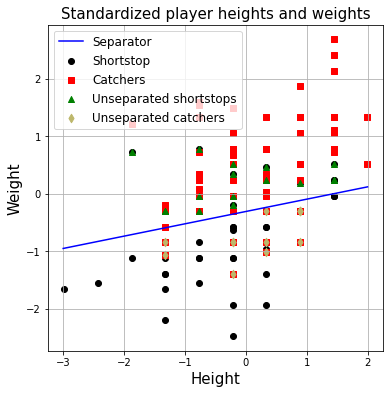

In [88]:
# A9:Inline(2/3)

#--- Your code starts here
is_sep = separated(data_bball, y_bball, ws[-1], bs[-1])
fig = plot_separated(data_bball, y_bball, ws[-1],bs[-1])
separated_percent = 100*sum(is_sep)/len(y_bball)
#--- your code stops here

print(separated_percent, "percent were separated")

Your percent separated should go up and your output figure should look like:

![img](./img/A9-expected-output.png)

Now, report the percent improvement:

In [89]:
# A9:Inline(1/2)

# About how much better did the optimized line perform: 8% or 4%?
# Print "8%" or "4%"
print("8%")

8%


__A10.__ (5 pts) As a last step, complete the function called `plot_convergence()` below, which accepts the full history of `ws` and `bs` that were output by your `GD` function and exhibits all lines corresponding to the steps along the way to convergence. 

\[Hint. Use changing alpha or a colormap to help illustrate the transition between values of $w$ and $b$\].

In [90]:
# A10:Function(5/5)

def plot_convergence(data, y, ws, bs):

    fig = plot_data(data, y)

    #--- Your code starts here
    for i in range(len(ws)):
        plt.plot(data[:,0], ((-ws[i][0]/ws[i][1]) *data[:,0] -bs[i]/ws[i][1]), 'b', alpha = (0.3*i)/len(ws))
    #--- Your code stops here
    
    return fig

Your output figure should look like:

![img](./img/A10-expected-output.png)

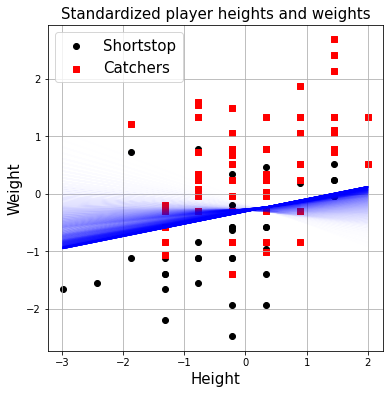

In [91]:
# A10:SanityCheck

fig = plot_convergence(data_bball, y_bball, ws, bs)